# Data viz

### Emilio Espinosa 

In [265]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [249]:
# Read data and put it directly into dataframe // 
link = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
covid = pd.read_csv(link)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221029 entries, 0 to 221028
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    221029 non-null  object 
 1   continent                                   208317 non-null  object 
 2   location                                    221029 non-null  object 
 3   date                                        221029 non-null  object 
 4   total_cases                                 212070 non-null  float64
 5   new_cases                                   211771 non-null  float64
 6   new_cases_smoothed                          210575 non-null  float64
 7   total_deaths                                192954 non-null  float64
 8   new_deaths                                  192870 non-null  float64
 9   new_deaths_smoothed                         191690 non-null  float64
 

In [290]:
covid['new_deaths_smoothed_per_million'].value_counts()

0.000    48111
0.021     1222
0.013      946
0.007      910
0.006      846
         ...  
4.289        1
2.589        1
4.840        1
6.444        1
4.037        1
Name: new_deaths_smoothed_per_million, Length: 11107, dtype: int64

In [289]:
covid['new_vaccinations_smoothed_per_million'].value_counts()


0.0        1830
3013.0      383
1082.0      315
4.0         315
105.0       259
           ... 
12305.0       1
10009.0       1
11785.0       1
17968.0       1
4360.0        1
Name: new_vaccinations_smoothed_per_million, Length: 12521, dtype: int64

## Covid around the world (in numbers)

       continent   total_cases
0         Africa  5.743919e+09
1           Asia  6.182029e+10
2         Europe  7.162076e+10
3  North America  4.499336e+10
4        Oceania  2.172886e+09
5  South America  2.805013e+10


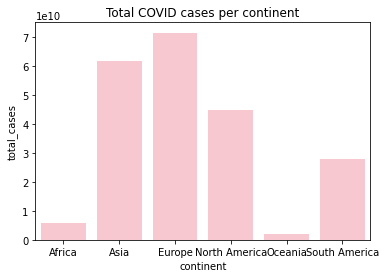

In [275]:
cov_cont = covid.groupby(["continent"]).total_cases.sum().reset_index()
print(cov_cont)
ax = sns.barplot(data=cov_cont, x='continent', y='total_cases', color="pink").set(title='Total COVID cases per continent')


#### The barplot shown above helps to identify the sum of total cases that every continent has had. It shows it in a very clear way as it is easy for the reader to understand. On the axis "x", it is possible to see the different continents and on the axis "y" the total cases they have had. 

## Covid around the world (%)

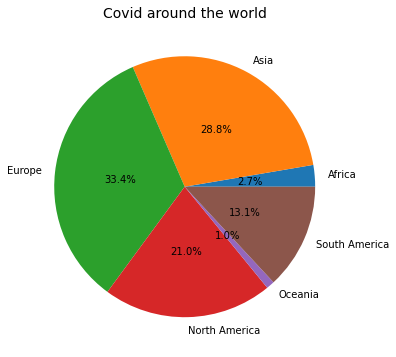

In [225]:
cov_cont = covid.groupby(["continent"]).total_cases.sum()
data = cov_cont/np.sum(cov_cont)*100
#data.plot.pie(autopct="%.1f%%")
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Covid around the world", fontsize=14);
  

#### The secong graph of the notebook uses the same "base" data that the first one. The difference is that in this case it is shown in a percentage of the total amount. I chose the pie chart as it can be really helpful to understand which continent has the most cases of the world.

## Deaths around the globe

(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

C:\Users\52333\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


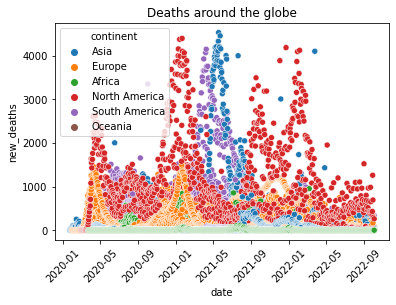

In [248]:
sns.scatterplot(data=covid,x='date',y='new_deaths',hue='continent').set(title='Deaths around the globe')
plt.xticks(rotation=45)

#### The third plot is a scatterplot and it was chosen because it is easy to read the data entries. In this plot we can see the new deaths during the period given in the data. This graph has a different color for each continent, therefore it is easy to see patterns and curves. For example, we can see that in North America the death curve happened before South America and Asia.

## Deaths vs Vaccine

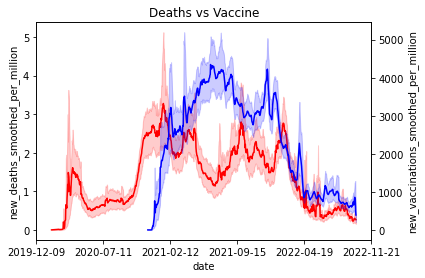

In [291]:
sns.lineplot(data=covid, x='date', y='new_deaths_smoothed_per_million',color="r")
ax2 = plt.twinx()
sns.lineplot(data=covid,x='date', y='new_vaccinations_smoothed_per_million', color="b", ax=ax2).set(title='Deaths vs Vaccine')
ax2.xaxis.set_major_locator(ticker.LinearLocator(6))
#plt.xticks(rotation=45)

#### The fourth plot shown is called lineplot. It is really useful in this case as it shows the data given period of time. For this example, we provided two different variables: new deaths per million and new vaccinations per million. This grapgh is really helpful to understand the impact vaccinations have had on covid and life span. The more people with vaccine the less deaths.

## Total cases vs New cases in Mexico

In [240]:
cov_loc = covid.groupby(["location"]).new_cases.sum().reset_index()

In [232]:
covid['location'].unique()
cov_mex = covid[covid['location'] == 'Mexico']
cov_mex['date']=pd.to_datetime(cov_mex['date'], format='%Y-%m-%d')

C:\Users\52333\AppData\Local\Temp\ipykernel_7680\2287202846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_mex['date']=pd.to_datetime(cov_mex['date'], format='%Y-%m-%d')


C:\Users\52333\AppData\Local\Temp\ipykernel_7680\4080574041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_mex2['year']= cov_mex['date'].dt.year
C:\Users\52333\AppData\Local\Temp\ipykernel_7680\4080574041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_mex2['month']= cov_mex['date'].dt.month


[Text(0.5, 1.0, 'Total cases vs New cases in Mexico')]

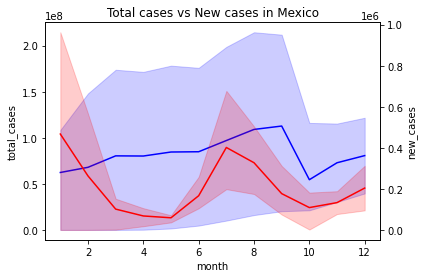

In [304]:
cov_mex2 = cov_mex
cov_mex2['year']= cov_mex['date'].dt.year
cov_mex2['month']= cov_mex['date'].dt.month
cov_mex2 = cov_mex.groupby([cov_mex['year'],cov_mex['month']]).total_cases.sum().reset_index()
cov_mex3 = cov_mex.groupby([cov_mex['year'],cov_mex['month']]).new_cases.sum().reset_index()

sns.lineplot(data=cov_mex2, x='month', y='total_cases',color="b", legend=True)
ax2 = plt.twinx()
sns.lineplot(data=cov_mex3,x='month', y='new_cases', color="r", ax=ax2, legend=True).set(title='Total cases vs New cases in Mexico')


#### The last plot is centered in one country in particular, Mexico. In here we can see the relationship between two y variables and how they differ from each other. The point of this particular graph is two show the trend of new and total cases through time and how one follows the other.

## Life span

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

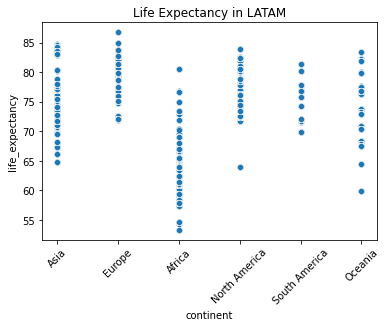

In [294]:
#life_latam = covid.query('continent=="South America"')
g=sns.scatterplot(data=covid, x='continent', y='life_expectancy').set(title='Life Expectancy in the world')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

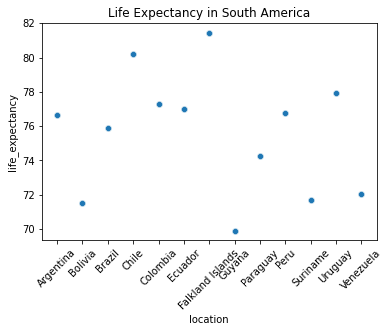

In [295]:
life_latam = covid.query('continent=="South America"')
g=sns.scatterplot(data=life_latam, x='location', y='life_expectancy').set(title='Life Expectancy in South America')
plt.xticks(rotation=45)

#### The last plots were chosen to show the different life expectancies in the world. It is a really useful plot to visualize data. In the first one is possible to see how certain continents have better life expectancies than others. It is possible to see the range between their own countries and the disparities they might have. On the other hand, in the second plot we go deeper into South America to show how the plot would look for one continent in particular. 

#### This has a relation with covid because the more life span the more access to healthcare.

<AxesSubplot:>

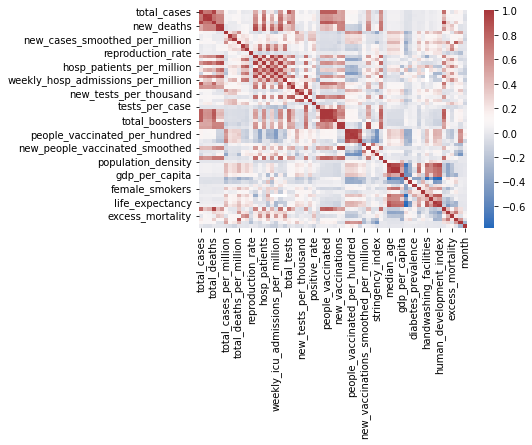

In [308]:
covid.corr()
sns.heatmap(data=covid.corr(), cmap='vlag')

#### Extra plot to understand the relationship between the variables of the database. Blue is indirect relationship and red is direct one